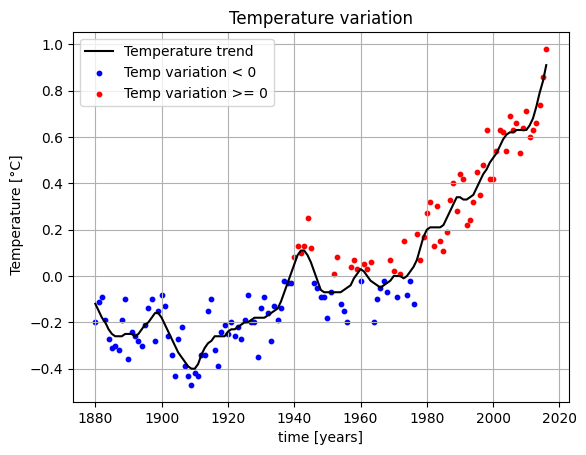

In [1]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt"
urllib.request.urlretrieve(url, "nasa-giss.txt")
data = np.loadtxt("nasa-giss.txt")
year = data[:, 0]
deltaT = data[:, 1]
smooth_deltaT = data[:, 2]
plt.plot(year, smooth_deltaT, color = "black",label='Temperature trend')
plt.xlabel("time [years]")
plt.ylabel(" Temperature [°C]")
plt.title("Temperature variation")
negDeltaT = np.where(deltaT < 0)
posDeltaT = np.where(deltaT >= 0)

plt.scatter(year[negDeltaT], deltaT[negDeltaT], s = 10,color='blue', label='Temp variation < 0')
plt.scatter(year[posDeltaT], deltaT[posDeltaT],s = 10, color='red', label='Temp variation >= 0')
plt.legend()
plt.grid()
plt.show()

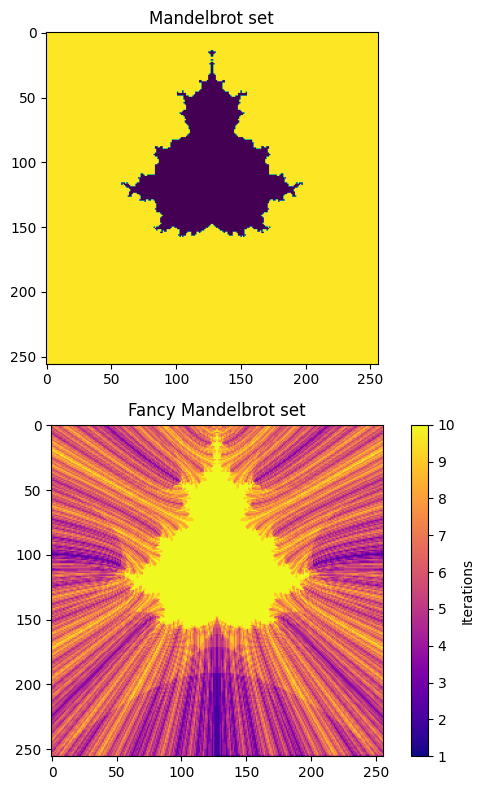

In [2]:
N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")
c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)
iterations = np.zeros((N,N), dtype=int)
for i in range(10):
    z = z**2 + c
    mask = z < 2
    iterations[mask] = iterations[mask] + 1
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0
fig = plt.figure()

ax1 = fig.add_subplot(211)

x = np.linspace(0,5,100)
ax1.imshow(m)
ax1.set_title("Mandelbrot set")
ax2 = fig.add_subplot(212)

img = ax2.imshow(iterations,cmap = "plasma")
ax2.set_title("Fancy Mandelbrot set")
cbar = fig.colorbar(img, ax=ax2)
cbar.set_label('Iterations')

# set the figure size
fig.set_size_inches(6, 8)

# tight_layout() makes sure things don't overlap
fig.tight_layout()